In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Diamonds Test

In [2]:
diamonds_test = pd.read_csv('diamonds_test.csv')
diamonds_test.head()

,id,city,cut,color,clarity,carat,depth,table,x,y,z
0,0,0,4,2,2,0.79,62.7,60.0,5.82,5.89,3.67
1,1,10,2,6,4,1.20,61.0,57.0,6.81,6.89,4.18
2,2,3,3,4,2,1.57,62.2,61.0,7.38,7.32,4.57
3,3,3,4,2,2,0.90,63.8,54.0,6.09,6.13,3.90
4,4,0,4,2,4,0.50,62.9,58.0,5.05,5.09,3.19


In [3]:
round(diamonds_test.describe(),2)

,id,city,cut,color,clarity,carat,depth,table,x,y,z
count,13485.00,13485.00,13485.00,13485.00,13485.00,13485.00,13485.00,13485.00,13485.00,13485.00,13485.00
mean,6742.00,5.78,2.55,2.58,3.82,0.80,61.74,57.49,5.74,5.74,3.54
std,3892.93,3.81,1.02,1.70,1.72,0.47,1.44,2.24,1.11,1.13,0.73
min,0.00,0.00,0.00,0.00,0.00,0.20,50.80,51.00,0.00,0.00,0.00
25%,3371.00,2.00,2.00,1.00,2.00,0.40,61.00,56.00,4.73,4.73,2.92
50%,6742.00,6.00,2.00,3.00,4.00,0.70,61.90,57.00,5.70,5.72,3.53
75%,10113.00,10.00,3.00,4.00,5.00,1.04,62.50,59.00,6.53,6.53,4.04
max,13484.00,12.00,4.00,6.00,7.00,5.01,79.00,73.00,10.74,31.80,31.80


In [4]:
num_feats = diamonds_test.loc[:,'carat':]
num_feats.head()

,carat,depth,table,x,y,z
0,0.79,62.7,60.0,5.82,5.89,3.67
1,1.20,61.0,57.0,6.81,6.89,4.18
2,1.57,62.2,61.0,7.38,7.32,4.57
3,0.90,63.8,54.0,6.09,6.13,3.90
4,0.50,62.9,58.0,5.05,5.09,3.19


In [5]:
num_feats_corr = num_feats.corr()
num_feats_corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,x,y,z
carat,1.000000,0.033385,0.176245,0.973283,0.951900,0.913598
depth,0.033385,1.000000,-0.303653,-0.022049,-0.024359,0.095831
table,0.176245,-0.303653,1.000000,0.193130,0.180943,0.138777
x,0.973283,-0.022049,0.193130,1.000000,0.977762,0.931211
y,0.951900,-0.024359,0.180943,0.977762,1.000000,0.916161
z,0.913598,0.095831,0.138777,0.931211,0.916161,1.000000


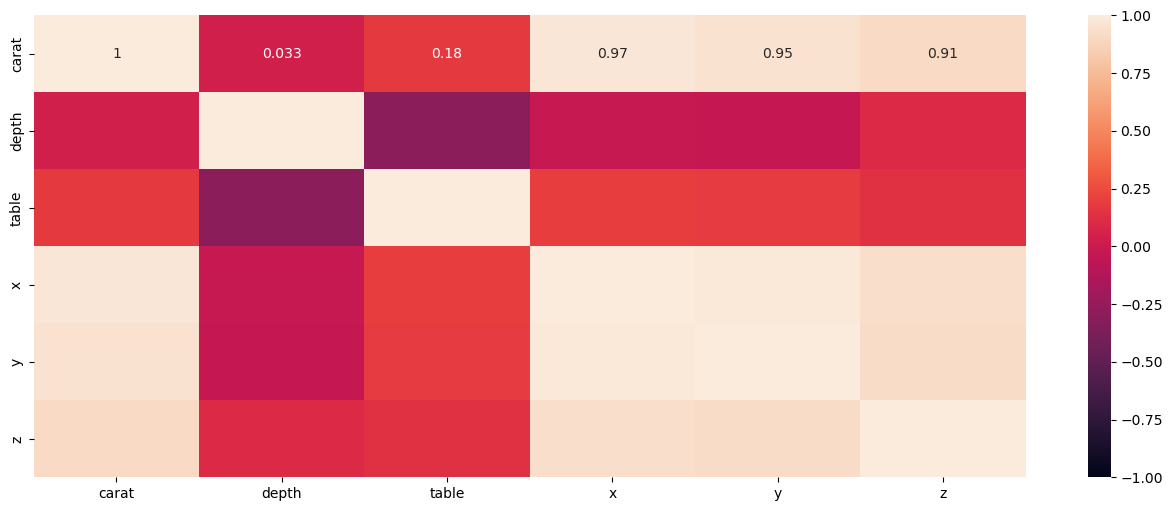

In [6]:
plt.figure(figsize=(16,6))
sns.heatmap(num_feats_corr, vmin=-1,vmax=1,annot=True)
plt.show()

In [7]:
num_feats_collin = num_feats.copy()
num_feats_collin.head()

,carat,depth,table,x,y,z
0,0.79,62.7,60.0,5.82,5.89,3.67
1,1.20,61.0,57.0,6.81,6.89,4.18
2,1.57,62.2,61.0,7.38,7.32,4.57
3,0.90,63.8,54.0,6.09,6.13,3.90
4,0.50,62.9,58.0,5.05,5.09,3.19


In [8]:
num_feats_collin= num_feats_collin.drop(columns='x')
num_feats_collin= num_feats_collin.drop(columns='y')
num_feats_collin= num_feats_collin.drop(columns='z')
num_feats_collin.head()

,carat,depth,table
0,0.79,62.7,60.0
1,1.20,61.0,57.0
2,1.57,62.2,61.0
3,0.90,63.8,54.0
4,0.50,62.9,58.0


In [9]:
num_feats_collin_corr = num_feats_collin.corr()
num_feats_collin_corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table
carat,1.000000,0.033385,0.176245
depth,0.033385,1.000000,-0.303653
table,0.176245,-0.303653,1.000000


Es posible que lo que influya en el precio de los diamantes sean el carat, depth y table

## Diamonds Train

In [10]:
diamonds_train = pd.read_csv('diamonds_train.csv')
diamonds_train.head()

,city,cut,color,clarity,carat,depth,table,x,y,z,price
0,2,3,6,5,1.21,62.4,58.0,6.83,6.79,4.25,4268
1,3,4,4,5,0.32,63.0,57.0,4.35,4.38,2.75,505
2,4,0,3,4,0.71,65.5,55.0,5.62,5.53,3.65,2686
3,3,1,0,2,0.41,63.8,56.0,4.68,4.72,3.00,738
4,2,2,3,2,1.02,60.5,59.0,6.55,6.51,3.95,4882


In [11]:
round(diamonds_train.describe(),2)

,city,cut,color,clarity,carat,depth,table,x,y,z,price
count,40455.00,40455.00,40455.0,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,5.76,2.55,2.6,3.84,0.80,61.75,57.45,5.73,5.73,3.54,3928.44
std,3.79,1.03,1.7,1.73,0.48,1.43,2.23,1.12,1.15,0.70,3992.42
min,0.00,0.00,0.0,0.00,0.20,43.00,43.00,0.00,0.00,0.00,326.00
25%,3.00,2.00,1.0,2.00,0.40,61.00,56.00,4.71,4.72,2.91,945.00
50%,6.00,2.00,3.0,4.00,0.70,61.80,57.00,5.69,5.71,3.52,2397.00
75%,9.00,3.00,4.0,5.00,1.04,62.50,59.00,6.54,6.54,4.04,5331.00
max,12.00,4.00,6.0,7.00,4.50,79.00,95.00,10.23,58.90,8.06,18823.00


In [12]:
num_feats_train = diamonds_train.loc[:,'carat':]
num_feats_train.head()

,carat,depth,table,x,y,z,price
0,1.21,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,63.0,57.0,4.35,4.38,2.75,505
2,0.71,65.5,55.0,5.62,5.53,3.65,2686
3,0.41,63.8,56.0,4.68,4.72,3.00,738
4,1.02,60.5,59.0,6.55,6.51,3.95,4882


In [13]:
num_feats_train_corr = num_feats_train.corr()
num_feats_train_corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,x,y,z,price
carat,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570,0.921935
depth,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655,-0.014864
table,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189,0.130111
x,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876,0.885848
y,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828,0.866163
z,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000,0.874500
price,0.921935,-0.014864,0.130111,0.885848,0.866163,0.874500,1.000000


El precio con lo que mas se relaciona es con el Carat

In [14]:
num_feats_train_collin = num_feats_train.copy()
num_feats_train_collin.head()

,carat,depth,table,x,y,z,price
0,1.21,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,63.0,57.0,4.35,4.38,2.75,505
2,0.71,65.5,55.0,5.62,5.53,3.65,2686
3,0.41,63.8,56.0,4.68,4.72,3.00,738
4,1.02,60.5,59.0,6.55,6.51,3.95,4882


In [15]:
num_feats_train_collin= num_feats_train_collin.drop(columns='x')
num_feats_train_collin= num_feats_train_collin.drop(columns='y')
num_feats_train_collin= num_feats_train_collin.drop(columns='z')
num_feats_train_collin.head()

,carat,depth,table,price
0,1.21,62.4,58.0,4268
1,0.32,63.0,57.0,505
2,0.71,65.5,55.0,2686
3,0.41,63.8,56.0,738
4,1.02,60.5,59.0,4882


In [16]:
num_feats_train_collin_corr = num_feats_train_collin.corr()
num_feats_train_collin_corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,price
carat,1.000000,0.026528,0.183392,0.921935
depth,0.026528,1.000000,-0.293114,-0.014864
table,0.183392,-0.293114,1.000000,0.130111
price,0.921935,-0.014864,0.130111,1.000000


## Limpieza de datos

### Diamonds test

In [17]:
diamonds_test.drop(columns=['id','x','y','z'], inplace=True)
diamonds_test.head()

,city,cut,color,clarity,carat,depth,table
0,0,4,2,2,0.79,62.7,60.0
1,10,2,6,4,1.20,61.0,57.0
2,3,3,4,2,1.57,62.2,61.0
3,3,4,2,2,0.90,63.8,54.0
4,0,4,2,4,0.50,62.9,58.0


In [18]:
from pathlib import Path
filepath = Path('./16.02/diamonds_test_carat_clean.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
diamonds_test.to_csv(filepath, index=False, encoding='utf-8')

### Diamonds train

In [19]:
diamonds_train.drop(columns=['x','y','z'], inplace=True)
diamonds_train.head()

,city,cut,color,clarity,carat,depth,table,price
0,2,3,6,5,1.21,62.4,58.0,4268
1,3,4,4,5,0.32,63.0,57.0,505
2,4,0,3,4,0.71,65.5,55.0,2686
3,3,1,0,2,0.41,63.8,56.0,738
4,2,2,3,2,1.02,60.5,59.0,4882


#### Outliers

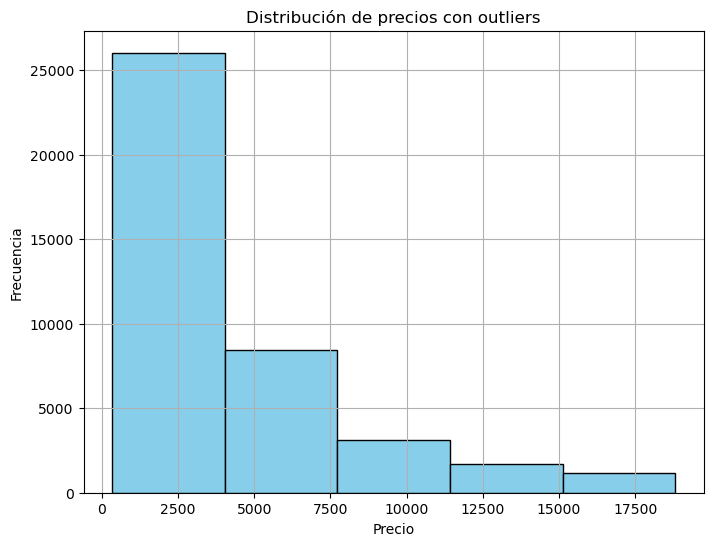

In [20]:
# Graficar histograma de precios sin outliers
plt.figure(figsize=(8, 6))
plt.hist(diamonds_train['price'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución de precios con outliers')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [21]:
pc75 = diamonds_train['price'].quantile(0.75)
pc25 = diamonds_train['price'].quantile(0.25)
price_iqr = pc75 - pc25
print(price_iqr)

4386.0


In [22]:
# Thresholds

# Upper threshold
upper = pc75 + (1.5 * price_iqr)

# Lower threshold
lower = pc25 - (1.5 * price_iqr)

print(lower,',', upper)

-5634.0 , 11910.0


In [23]:
# Subsetting data according to chart

no_outliers = diamonds_train[(diamonds_train['price'] > lower ) & (diamonds_train['price'] < upper)]
print(no_outliers['price'].describe())

count    37814.000000
mean      3157.454144
std       2770.447265
min        326.000000
25%        907.000000
50%       2142.500000
75%       4667.750000
max      11906.000000
Name: price, dtype: float64


In [24]:
diamonds_train = no_outliers.copy()
diamonds_train.reset_index(drop=True)

,city,cut,color,clarity,carat,depth,table,price
0,2,3,6,5,1.21,62.4,58.0,4268
1,3,4,4,5,0.32,63.0,57.0,505
2,4,0,3,4,0.71,65.5,55.0,2686
3,3,1,0,2,0.41,63.8,56.0,738
4,2,2,3,2,1.02,60.5,59.0,4882
...,...,...,...,...,...,...,...,...
37809,3,2,2,4,0.71,61.9,56.0,3710
37810,1,2,3,4,1.34,62.7,57.0,10070
37811,3,2,4,2,1.01,62.7,56.0,5457
37812,3,2,6,4,0.33,61.9,54.3,456


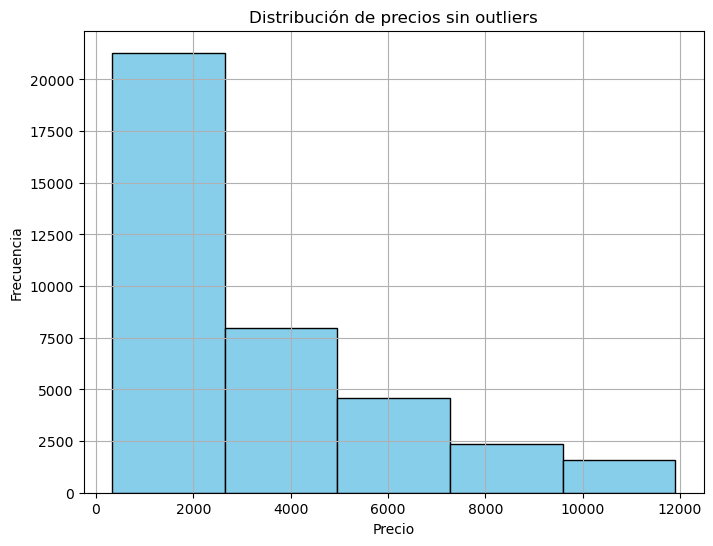

In [25]:
# Graficar histograma de precios sin outliers
plt.figure(figsize=(8, 6))
plt.hist(no_outliers['price'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución de precios sin outliers')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [26]:
from pathlib import Path
filepath = Path('./16.02/diamonds_train_carat_clean.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
diamonds_train.to_csv(filepath, index=False, encoding='utf-8')